# 地球上からみた火星の位置

## 導入
このnotebookでは，天球上で火星の動きがどのようになるのかを計算するもの。

## 理論
地球の公転周期を$T_{E} = 1.00000$[年]，火星の公転周期を$T_{M} = 1.88089$[年]，公転軌道を太陽を中心とする同心円と仮定する。また，そのときの公転軌道の半径について，地球のものを$R_{E} = 1.4960 \times 10^8$[km]，火星のものを$R_{M} = 2.2794 \times 10^8$[km]とする。

このとき，時刻$t$における地球の位置$r_{E}$と火星の位置$r_{M}$はそれぞれ
\begin{align}
r_{E} = R_{E} \begin{pmatrix} \cos \left( 2 \pi t / T_{E} \right) \\ \sin \left( 2 \pi t / T_{E} \right) \end{pmatrix}, \\
r_{M} = R_{M} \begin{pmatrix} \cos \left( 2 \pi t / T_{M} \right) \\ \sin \left( 2 \pi t / T_{M} \right) \end{pmatrix} \\
\end{align}
で表される。

したがって，地球を基準とする火星の位置$p(t)$は
\begin{equation}
p(t) = r_{M} - r_{E} = \begin{pmatrix}
R_{M} \cos \left( 2 \pi t / T_{M} \right) - R_{E} \cos \left( 2 \pi t / T_{E} \right) \\
R_{M} \sin \left( 2 \pi t / T_{M} \right) - R_{E} \sin \left( 2 \pi t / T_{E} \right) \\
\end{pmatrix}
\end{equation}
で求まる。

ここで，Numpyの関数である`np.arctan2()`を用いると，このベクトル$p(t)$と$x$軸方向とのなす角$\varphi$を求めることができる。

このnotebookではこの角度$\varphi$を連続的にプロットすることで，地球上から火星の見える位置，すなわち，天球上での火星の位置がどのように変わるのかを見る。

## 計算

### 天球上の火星の位置

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

font = {'family':'YuGothic'}
matplotlib.rc('font',**font)

In [3]:
# define constant
Period_Earth = 1.00000 # years
Period_Mars = 1.88089 # years
Distance_Earth = 1.4960 # ×10^{8}km
Distance_Mars = 2.2794 # ×10^{8}km

In [91]:
# Angle
def angle_translator(theta):
    return 2 * np.pi * (theta - np.floor(theta))

def polar(r, theta):
    return np.array([r * np.cos(theta), r * np.sin(theta)])


def angle_on_earth(t):
    # Location of two planets
    thetaE = angle_translator(2 * np.pi * t/Period_Earth)
    thetaM = angle_translator(2 * np.pi * t/Period_Mars)
    Location_Earth = polar(Distance_Earth, thetaE)
    Location_Mars = polar(Distance_Mars, thetaM)
    Location_diff = Location_Mars - Location_Earth
    # Angle
    return np.arctan2(Location_diff[1],Location_diff[0])

In [92]:
time = [t/1000 for t in range(0,501)]
angle = [angle_on_earth(t) for t in time]
X = np.cos(angle)
Y = np.sin(angle)

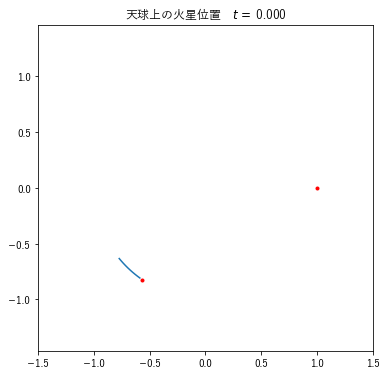

In [108]:
fig = plt.figure(figsize=(6,6))

def update(i, Xdat, Ydat):
    if i != 0:
        plt.cla()                      # 現在描写されているグラフを消去
    plt.title('天球上の火星位置　$t=$ ' + str(time[i]).ljust(5, '0'))
    plt.axis('equal')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.plot(Xdat[i], Ydat[i], "r", marker='.')
    if i <= 9: plt.plot(Xdat[:i], Ydat[:i])
    if i >= 10: plt.plot(Xdat[i-10:i], Ydat[i-10:i])
        
ani = animation.FuncAnimation(fig, update, fargs = (X, Y), interval=100, frames=500)
ani.save("MarsOnEarth.gif", writer = 'imagemagick', dpi=100)

### 2つの惑星の位置関係
参考までに，地球と火星の位置関係をプロットする。

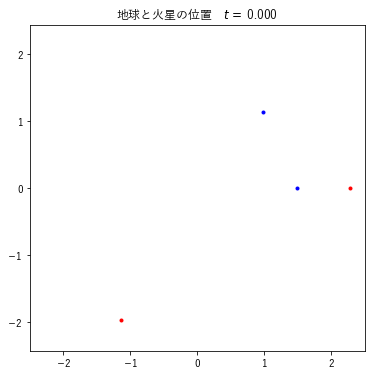

In [117]:
fig2 = plt.figure(figsize=(6,6))

# thetaE = [angle_translator(2 * np.pi * t/Period_Earth) for t in time]
# thetaM = [angle_translator(2 * np.pi * t/Period_Mars) for t in time]
Location_Earth = [polar(Distance_Earth, angle_translator(2 * np.pi * t/Period_Earth)) for t in time]
Location_Mars = [polar(Distance_Mars, angle_translator(2 * np.pi * t/Period_Mars)) for t in time]

def update2(i, LocEarth, LocMars):
    if i != 0:
        plt.cla()                      # 現在描写されているグラフを消去
    plt.title('地球と火星の位置　$t=$ ' + str(time[i]).ljust(5, '0'))
    plt.axis('equal')
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    plt.plot(LocEarth[i][0], LocEarth[i][1], "b", marker='.')
    plt.plot(LocMars[i][0], LocMars[i][1], "r", marker='.')
        
ani = animation.FuncAnimation(fig2, update2, fargs = (Location_Earth, Location_Mars), interval=100, frames=500)
ani.save("EarthAndMars.gif", writer = 'imagemagick', dpi=100)